In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。通常都是在建模过程中逐渐导入需要的库。

In [2]:
data = pd.read_csv(r".\rankingcard.csv",index_col=0)

In [3]:
#观察数据类型
data.head()#注意可以看到第一列为标签，剩下的10列为特征

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [6]:
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
#探索缺失值
data.isnull().sum()/data.shape[0]#得到缺失值的比例
#data.isnull().mean()#上一行代码的另一种形式书写

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [9]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
#这里用均值填补家庭人数这一项 
#如果你选择的是删除那些缺失了2.5%的特征，千万记得恢复索引哟~
 
data.info()
data.isnull().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [17]:
def fill_missing_rf(X,y,to_fill):

    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)

    return Ypredict

In [18]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]#y = data.iloc[:,0]
X.shape#(149391, 10)

(149391, 10)

In [19]:
#=====[TIME WARNING:1 min]=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
y_pred.shape

(29221,)

In [20]:
#注意可以通过以下代码检验数据是否数量相同
# y_pred.shape ==  data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape

#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [21]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.804408,13238.652754,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [22]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
# 查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [23]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]
data.shape

(149390, 11)

In [24]:
"""
另外，有三个指标看起来很奇怪：
 
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
 
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
 
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
 
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [25]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [26]:
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
# 本可以判断，这些样本是某种异常，应该把它们删除。
 
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
#一定要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [27]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [28]:
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：149165; 1占6.62%; 0占93.38%


In [29]:
#如果报错，就在prompt安装：pip install imblearn
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [19]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%

样本个数：278584; 1占50.00%; 0占50.00%


In [30]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
model_data.to_csv(r".\model_data.csv")#训练数据
vali_data.to_csv(r".\vali_data.csv")#验证数据

In [31]:
# dataframe["列名"]
#当这个列存在的时候，就是索引；当这个列名不存在的时候，DataFrame会自动生成叫做这个列名的一个新的列


#按照等频对需要分箱的列进行分箱

#“age”为例子
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)#等频分箱
 
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.192056,70,0,1316.000000,0.09,13,0,1,0,0.0,"(68.0, 72.0]"
1,0,0.390715,61,0,0.173285,6572.00,10,0,0,1,1.0,"(60.0, 63.0]"
2,0,0.002319,66,0,0.042342,6541.00,6,0,0,0,0.0,"(65.0, 68.0]"
3,0,0.041662,30,0,0.340896,3481.00,7,0,1,0,1.0,"(29.0, 33.0]"
4,0,0.000000,49,1,1515.000000,0.18,8,0,1,1,1.0,"(48.0, 50.0]"


In [32]:
model_data["qcut"]
model_data["qcut"].value_counts()

(60.0, 63.0]      7569
(41.0, 44.0]      6675
(20.999, 29.0]    5978
(29.0, 33.0]      5785
(36.0, 39.0]      5692
(48.0, 50.0]      5338
(72.0, 78.0]      5284
(46.0, 48.0]      5273
(44.0, 46.0]      5051
(50.0, 52.0]      5046
(52.0, 54.0]      5042
(54.0, 56.0]      4915
(65.0, 68.0]      4912
(68.0, 72.0]      4813
(33.0, 36.0]      4764
(56.0, 58.0]      4723
(78.0, 109.0]     4716
(58.0, 60.0]      4521
(39.0, 41.0]      4351
(63.0, 65.0]      3967
Name: qcut, dtype: int64

In [34]:
#所有箱子的上限和下限
updown

array([ 21.,  29.,  33.,  36.,  39.,  41.,  44.,  46.,  48.,  50.,  52.,
        54.,  56.,  58.,  60.,  63.,  65.,  68.,  72.,  78., 109.])

In [35]:
updown.shape

(21,)

In [36]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 29.0]",5306,5306,5306,5306,5306,5306,5306,5306,5306,5306,5306
"(29.0, 33.0]",5186,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186
"(33.0, 36.0]",4290,4290,4290,4290,4290,4290,4290,4290,4290,4290,4290
"(36.0, 39.0]",5156,5156,5156,5156,5156,5156,5156,5156,5156,5156,5156
"(39.0, 41.0]",3951,3951,3951,3951,3951,3951,3951,3951,3951,3951,3951
"(41.0, 44.0]",6117,6117,6117,6117,6117,6117,6117,6117,6117,6117,6117
"(44.0, 46.0]",4628,4628,4628,4628,4628,4628,4628,4628,4628,4628,4628
"(46.0, 48.0]",4857,4857,4857,4857,4857,4857,4857,4857,4857,4857,4857
"(48.0, 50.0]",4911,4911,4911,4911,4911,4911,4911,4911,4911,4911,4911


In [37]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]

coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
 
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 29.0, 5306, 672),
 (29.0, 33.0, 5186, 599),
 (33.0, 36.0, 4290, 474),
 (36.0, 39.0, 5156, 536),
 (39.0, 41.0, 3951, 400),
 (41.0, 44.0, 6117, 558),
 (44.0, 46.0, 4628, 423),
 (46.0, 48.0, 4857, 416),
 (48.0, 50.0, 4911, 427),
 (50.0, 52.0, 4652, 394),
 (52.0, 54.0, 4698, 344),
 (54.0, 56.0, 4617, 298),
 (56.0, 58.0, 4502, 221),
 (58.0, 60.0, 4297, 224),
 (60.0, 63.0, 7232, 337),
 (63.0, 65.0, 3845, 122),
 (65.0, 68.0, 4776, 136),
 (68.0, 72.0, 4698, 115),
 (72.0, 78.0, 5155, 129),
 (78.0, 109.0, 4619, 97)]

In [64]:
 0 in num_bins[0][2:]

False

In [65]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue

    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
        break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
    range(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

In [38]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例 (bad contribution)
 
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
 
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [48]:
num_bins_ = num_bins.copy()
 
import matplotlib.pyplot as plt
import scipy

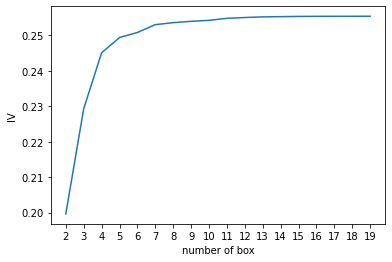

In [40]:
IV = []
axisx = []
 
while len(num_bins_) > 2:#大于设置的最低分箱个数
    pvs = []
    #获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
#选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6

In [42]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
 
afterbins = get_bin(num_bins,6)
 
afterbins

[(21.0, 29.0, 5306, 672),
 (29.0, 41.0, 18583, 2009),
 (41.0, 52.0, 25165, 2218),
 (52.0, 56.0, 9315, 642),
 (56.0, 63.0, 16031, 782),
 (63.0, 109.0, 23093, 599)]

In [43]:
bins_df = get_woe(num_bins)
 
bins_df
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,29.0,5306,672,5978,0.057252,0.112412,0.054424,0.097082,-0.578741
1,29.0,41.0,18583,2009,20592,0.197213,0.097562,0.190609,0.290234,-0.420466
2,41.0,52.0,25165,2218,27383,0.262252,0.080999,0.258121,0.320428,-0.216228
3,52.0,56.0,9315,642,9957,0.095360,0.064477,0.095545,0.092748,0.029717
4,56.0,63.0,16031,782,16813,0.161021,0.046512,0.164432,0.112973,0.375349
5,63.0,109.0,23093,599,23692,0.226902,0.025283,0.236868,0.086536,1.006947


In [49]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [50]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


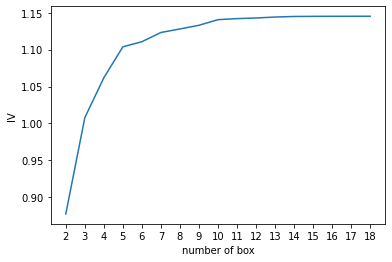

age


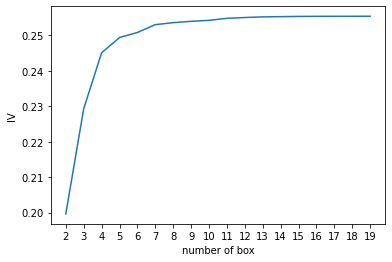

NumberOfTime30-59DaysPastDueNotWorse


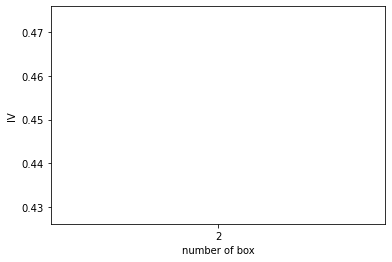

DebtRatio


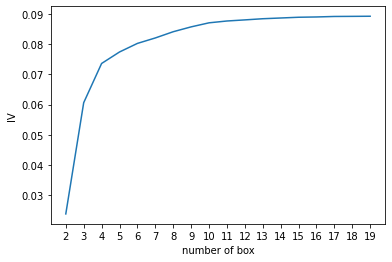

MonthlyIncome


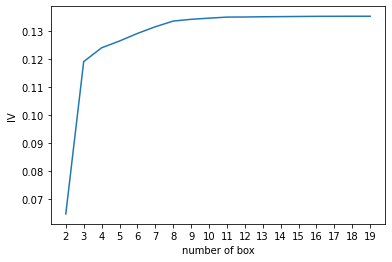

NumberOfOpenCreditLinesAndLoans


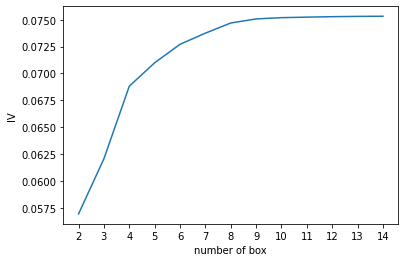

NumberOfTimes90DaysLate


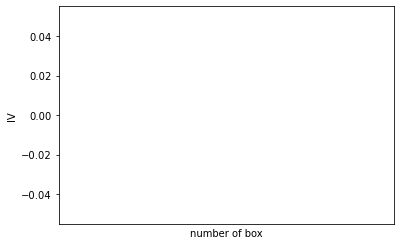

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [51]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [52]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [53]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.11347458220000006,
  0.3497326964,
  0.6941633654000011,
  0.8468921358000003,
  0.9999999,
  inf],
 'age': [-inf, 41.0, 52.0, 56.0, 63.0, inf],
 'DebtRatio': [-inf, 0.4157281709, 0.6543271038000001, 5.0, inf],
 'MonthlyIncome': [-inf, 0.17, 6615.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 2.0, 5.0, 8.0, 13.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [54]:
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
 
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
 
data.head()

,age,SeriousDlqin2yrs,cut
0,70,0,"(64.0, 74.0]"
1,61,0,"(58.757, 64.0]"
2,66,0,"(64.0, 74.0]"
3,30,0,"(-inf, 48.5]"
4,49,0,"(48.5, 58.757]"


In [55]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut             SeriousDlqin2yrs
(-inf, 48.5]    0                   39491
                1                    4078
(48.5, 58.757]  0                   23380
                1                    1684
(58.757, 64.0]  0                   13609
                1                     622
(64.0, 74.0]    0                   13264
                1                     371
(74.0, inf]     0                    7749
                1                     167
Name: SeriousDlqin2yrs, dtype: int64

In [56]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39491,4078
"(48.5, 58.757]",23380,1684
"(58.757, 64.0]",13609,622
"(64.0, 74.0]",13264,371
"(74.0, inf]",7749,167


In [57]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39491,4078,-0.374610
"(48.5, 58.757]",23380,1684,-0.014367
"(58.757, 64.0]",13609,622,0.440471
"(64.0, 74.0]",13264,371,0.931531
"(74.0, inf]",7749,167,1.192249


In [61]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.113]     1.317202
 (0.113, 0.35]     0.684404
 (0.35, 0.694]    -0.179108
 (0.694, 0.847]   -0.831694
 (0.847, 1.0]     -1.174766
 (1.0, inf]       -2.135168
 dtype: float64,
 'age': cut
 (-inf, 41.0]   -0.457848
 (41.0, 52.0]   -0.216228
 (52.0, 56.0]    0.029717
 (56.0, 63.0]    0.375349
 (63.0, inf]     1.006947
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.416]     0.149463
 (0.416, 0.654]   -0.193183
 (0.654, 5.0]     -0.612781
 (5.0, inf]        0.190122
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.17]      0.937374
 (0.17, 6615.0]   -0.222821
 (6615.0, inf]     0.316363
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 2.0]   -0.675745
 (2.0, 5.0]    -0.023193
 (5.0, 8.0]     0.254054
 (8.0, 13.0]    0.122224
 (13.0, inf]   -0.081802
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.526219
 (0.0, 1.0]    -0.892177
 (1.0, 2.0]    -1.616123
 (2.0, inf]    -2.253158
 dtype: float6

In [63]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
model_woe.head()

,age
0,1.006947
1,0.375349
2,1.006947
3,-0.457848
4,-0.216228


In [64]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1.006947,0.684404,0.190122,0.937374,0.122224,0.526219,0.382509,0.242741,0.276758,0.157108,0
1,0.375349,-0.179108,0.149463,-0.222821,0.122224,0.526219,0.382509,-0.224504,-1.853351,-0.095466,0
2,1.006947,1.317202,0.149463,-0.222821,0.254054,0.526219,0.382509,-0.224504,0.276758,0.157108,0
3,-0.457848,1.317202,0.149463,-0.222821,0.254054,0.526219,0.382509,0.242741,0.276758,-0.095466,0
4,-0.216228,1.317202,0.190122,-0.222821,0.254054,-0.892177,0.382509,0.242741,-1.853351,-0.095466,0


In [65]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.179108,-0.457848,0.149463,-0.222821,0.122224,0.526219,0.382509,-0.224504,0.276758,0.157108,0
1,-0.831694,-0.457848,0.149463,-0.222821,0.254054,0.526219,0.382509,-0.224504,0.276758,0.157108,0
2,-0.831694,-0.457848,0.149463,-0.222821,-0.675745,0.526219,-1.988355,-0.224504,0.276758,-0.384379,0
3,-0.831694,-0.216228,-0.193183,0.316363,0.254054,0.526219,0.382509,0.242741,0.276758,0.157108,0
4,-0.179108,-0.457848,-0.612781,-0.222821,0.254054,0.526219,0.382509,0.242741,0.276758,-0.212972,0


In [66]:
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [67]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)#0.8641356370249832

0.9370279329608938

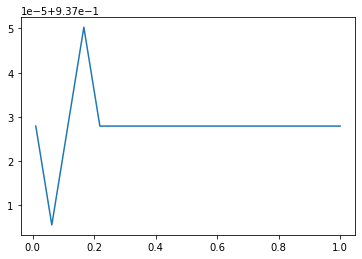

C:\anaconda\envs\sk-learn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda\envs\sk-learn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda\envs\sk-learn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda\envs\sk-learn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda\envs\sk-learn\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

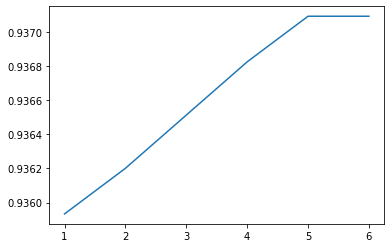

In [68]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [69]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

'''
虚线: 判对一个1的代价，就是要判错一个0
我们希望极偏左的，即每判对一个1，判错一个0的概率很小
'''

ModuleNotFoundError: No module named 'scikitplot'

In [70]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [71]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])

array([556.60445247])

In [72]:
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 41.0]    -7.722077
(41.0, 52.0]    -3.646904
(52.0, 56.0]     0.501211
(56.0, 63.0]     6.330653
(63.0, inf]     16.983217
dtype: float64

In [73]:
file = "./ScoreData.csv"

#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")